## 와인의 종류 예측하기

- 속성 12개 : 주석산 농도, 아세트산 농도, 구연산 농도, 잔류 당분 농도, 염화나트륨 농도, 유리 아황산 농도, 총 아황산 농도, 밀도, pH, 황산칼륨 농도, 알코올 도수, 와인의 맛(0~10등급), 클래스(1:레드 와인, 0: 화이트 와인)

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/hjh_kita_directory/Github/kita_231026/m6_dl/wine.csv', header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import random as python_random

tf.random.set_seed(123)
np.random.seed(123)
python_random.seed(123)

df = pd.read_csv('/content/drive/MyDrive/hjh_kita_directory/Github/kita_231026/m6_dl/wine.csv', header=None)
df.head()

# 와인의 속성을 X로 와인의 분류를 y로 저장합니다.
X = df.iloc[:,0:12]
y = df.iloc[:, 12]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=0)

# 모델 구조를 설정
model = Sequential()
model.add(Dense(30, input_dim=12, activation='relu')) # input_dim=12 입력 독립변수 차원 12
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# model.summary()

# 모델 컴파일
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# 모델 실행
history = model.fit(X_train, y_train, epochs=50, batch_size=500, validation_split=0.25, verbose=0) # 검증셋 0.8x0.25 = 0.2

# 테스트 결과 출력
score = model.evaluate(X_test, y_test)
print('Test accuracy:', score[1])

41/41 [==============================] - 0s 3ms/step - loss: 0.1663 - accuracy: 0.9400
Test accuracy: 0.9399999976158142


In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 30)                390       
                                                                 
 dense_9 (Dense)             (None, 12)                372       
                                                                 
 dense_10 (Dense)            (None, 8)                 104       
                                                                 
 dense_11 (Dense)            (None, 1)                 9         
                                                                 
Total params: 875 (3.42 KB)
Trainable params: 875 (3.42 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### seed 설정
- NumPy의 무작위 작업에 대한 전역 제어를 위해 np.random.seed를 설정.
- np.random.seed(123)를 설정해도 스크립트를 실행할 때마다 정확히 동일한 학습 평가데이터 분할이 재현되도록 보장하려는 경우 train_test_split과 같은 scikit-learn 함수에 random_state를 지정.
- TensorFlow를 사용하는 경우 TensorFlow 작업에 tf.random.set_seed를 사용하며 신경망 레이어의 무작위 가중치 초기화, 훈련 프로세스의 임의성(예: , 이 특정 코드에 없는 드롭아웃 레이어를 사용하는 경우) 또는 임의성을 포함하는 기타 TensorFlow 작업을 사용하는 경우에 적용. 단순한 모델이나 특정 데이터 세트에 대해 훈련된 모델은 다양한 초기화에서 성능에 큰 변화를 나타내지 않을 수 있다
- Python 내장 random 모듈이 스크립트의 어느 곳에서나 사용되는 경우 해당 모듈의 시드를 설정. TensorFlow 작업 자체에 'python_random.seed(123)'를 직접 사용할 필요가 없지만 스크립트 시작 부분에 python_random.seed(123)를 설정하면 난수 생성을 위해 내장된 python random 모듈을 사용하는 모든 Python 작업에 영향을 미칠 수 있다.

### 에포크별 모델 성능 체크

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint
# 모델 저장 조건 설정
modelpath = "/content/drive/MyDrive/hjh_kita_directory/Github/kita_231026/m6_dl/data/model/all/{epoch:02d}-{val_accuracy:.4f}.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, verbose=1)

# 모델 실행
history=model.fit(X_train, y_train, epochs=50, batch_size=500, validation_split=0.25, verbose=0, callbacks=[checkpointer])


Epoch 1: saving model to /content/drive/MyDrive/hjh_kita_directory/Github/kita_231026/m6_dl/data/model/all/01-0.9323.hdf5

Epoch 2: saving model to /content/drive/MyDrive/hjh_kita_directory/Github/kita_231026/m6_dl/data/model/all/02-0.9331.hdf5

Epoch 3: saving model to /content/drive/MyDrive/hjh_kita_directory/Github/kita_231026/m6_dl/data/model/all/03-0.9308.hdf5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 4: saving model to /content/drive/MyDrive/hjh_kita_directory/Github/kita_231026/m6_dl/data/model/all/04-0.9338.hdf5

Epoch 5: saving model to /content/drive/MyDrive/hjh_kita_directory/Github/kita_231026/m6_dl/data/model/all/05-0.9323.hdf5

Epoch 6: saving model to /content/drive/MyDrive/hjh_kita_directory/Github/kita_231026/m6_dl/data/model/all/06-0.9338.hdf5

Epoch 7: saving model to /content/drive/MyDrive/hjh_kita_directory/Github/kita_231026/m6_dl/data/model/all/07-0.9338.hdf5

Epoch 8: saving model to /content/drive/MyDrive/hjh_kita_directory/Github/kita_231026/m6_dl/data/model/all/08-0.9346.hdf5

Epoch 9: saving model to /content/drive/MyDrive/hjh_kita_directory/Github/kita_231026/m6_dl/data/model/all/09-0.9338.hdf5

Epoch 10: saving model to /content/drive/MyDrive/hjh_kita_directory/Github/kita_231026/m6_dl/data/model/all/10-0.9346.hdf5

Epoch 11: saving model to /content/drive/MyDrive/hjh_kita_directory/Github/kita_231026/m6_dl/data/model/all/11-0.9338.hdf5

Epoch 12: sav

### 그래프로 과적합 확인하기

History 객체

- 신경망 훈련을 위해 Keras 또는 TensorFlow 사용 시 model.fit()과 같은 호출로 훈련 작업을 실행하면 History 객체가 반환. 이 객체에는 연속적인 에포크의 훈련 손실 값과 측정항목 값 기록뿐만 아니라 해당하는 경우 검증 손실 값과 검증 측정항목 값도 포함.
- 코드에서 얻은 History 객체의 내용을 보려면 훈련 과정 중에 기록된 측정항목이 포함된 사전인 history 속성에 액세스. 'history.history' 사전의 각 키는 훈련 중에 모니터링된 측정항목에 해당

In [ ]:
# 그래프 확인을 위한 긴 학습 (컴퓨터 환경에 따라 시간이 다소 걸릴 수 있습니다.)
history=model.fit(X_train, y_train, epochs=2000, batch_size=500, verbose=0, validation_split=0.25)

In [ ]:
# Print the keys of the history object to understand what metrics are available
print(history.history.keys())

# To access a specific metric, for example, the training loss, you can do:
print(history.history['loss'])

# If you also have validation metrics, you can access them like this:
print(history.history['val_loss']) # For validation loss

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])
[0.13058431446552277, 0.1310095340013504, 0.1313897669315338, 0.12948545813560486, 0.1321655511856079, 0.13071909546852112, 0.1321723908185959, 0.12746407091617584, 0.12532390654087067, 0.1270846277475357, 0.12571661174297333, 0.1237512156367302, 0.12301516532897949, 0.12178440392017365, 0.12137573957443237, 0.1207265630364418, 0.12016084045171738, 0.12039151787757874, 0.11880756914615631, 0.1206638365983963, 0.11743573844432831, 0.11724135279655457, 0.11630039662122726, 0.11545378714799881, 0.11518822610378265, 0.11439558863639832, 0.11414243280887604, 0.11370810866355896, 0.11380692571401596, 0.1132243350148201, 0.11138707399368286, 0.11107203364372253, 0.11041329801082611, 0.1104913055896759, 0.10929945856332779, 0.11036872863769531, 0.10841809213161469, 0.10773339122533798, 0.10781680047512054, 0.10685127228498459, 0.10758006572723389, 0.10781004279851913, 0.10789010673761368, 0.1057460606098175, 0.10597140341997147, 0.099

In [ ]:
# history에 저장된 학습 결과를 확인
hist_df = pd.DataFrame(history.history)
hist_df.head()

,loss,accuracy,val_loss,val_accuracy
0,0.130584,0.952014,0.130970,0.949231
1,0.131010,0.955094,0.128787,0.944615
2,0.131390,0.950731,0.127585,0.949231
3,0.129485,0.951245,0.130339,0.950769
4,0.132166,0.952784,0.127695,0.946923


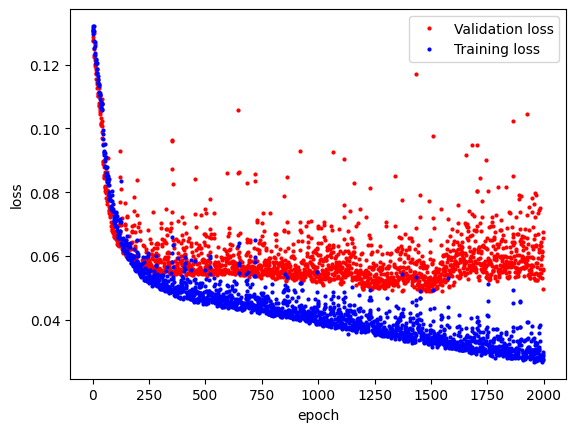

In [ ]:
import matplotlib.pyplot as plt

# y_vloss 에 테스트셋(여기서는 검증셋)의 오차를 저장합니다.
y_vloss=hist_df['val_loss']

# y_loss에 학습셋의 오차를 지정합니다.
y_loss = hist_df['loss']

# x 값을 지정하고 테스트셋(검증셋)의 오차를 빨간색으로, 학습셋의 오차를 파란색으로 표시합니다.
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, "o", c="red", markersize=2, label='Validation loss')
plt.plot(x_len, y_loss, "o", c="blue", markersize=2, label='Training loss')

plt.legend(loc='upper right')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

# Training loss 는 계속 내려감..
# Validation loss 는 내려가다가 어느 지점부터 내려가지 못함.

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import os
import pandas as pd
import numpy as np
import random as python_random

np.random.seed(123)  # Numpy module.
python_random.seed(123)  # Python random module.
tf.random.set_seed(123)  # TensorFlow module.

# 데이터를 입력합니다.
df = pd.read_csv('/content/drive/MyDrive/hjh_kita_directory/Github/kita_231026/m6_dl/wine.csv', header=None)

# 와인의 속성을 X로 와인의 분류를 y로 저장합니다.
X = df.iloc[:,0:12]
y = df.iloc[:,12]

#학습셋과 테스트셋으로 나눕니다.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=0)

# 모델 구조를 설정합니다.
model = Sequential()
model.add(Dense(30,  input_dim=12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

#모델을 컴파일합니다.
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                390       
                                                                 
 dense_1 (Dense)             (None, 12)                372       
                                                                 
 dense_2 (Dense)             (None, 8)                 104       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 875 (3.42 KB)
Trainable params: 875 (3.42 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


[ callback ]

callbacks=[early_stopping_callback, checkpointer]

학습 과정 중에 특정 이벤트가 발생했을 때, 취할 행동을 정의.

- early_stopping_callback: 이 콜백은 모델의 성능이 더 이상 개선되지 않을 때 학습을 조기에 중단하도록 설정. 예를 들어, 검증 데이터에 대한 손실이 일정 기간 동안 개선되지 않으면 학습을 멈춘다. 이는 과적합을 방지하고 학습 시간을 단축시키는 데 도움이 된다.
- checkpointer: 이 콜백은 모델의 중간 학습 상태를 파일로 저장하여, 학습 과정에서 가장 좋은 모델을 보존할 수 있게 한다. 이를 통해 나중에 모델을 재사용하거나, 학습 과정이 끝난 후 최적의 모델 상태로 복원할 수 있다.

이 코드는 신경망 모델의 학습 과정을 세밀하게 제어하면서, 과적합을 방지하고, 학습 과정에서 모델의 최적 상태를 저장하는 방법을 보여준다.

### 학습의 자동 중단 및 최적화 모델 저장

In [ ]:
# 학습이 언제 자동 중단 될지를 설정합니다.
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=30)

# 최적화 모델이 저장될 폴더와 모델의 이름을 정합니다.
modelpath="/content/drive/MyDrive/hjh_kita_directory/Github/kita_231026/m6_dl/data/model/bestmodel.hdf5"
# bestmodel.hdf5 이것은 가중치한것 되어있는건데 경로 따라가보면 파일 있음.

# 최적화 모델을 업데이트하고 저장
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=0, save_best_only=True)

# 모델 실행
history = model.fit(X_train, y_train, epochs=2000, batch_size=500, validation_split=0.25, \
                    verbose=1, callbacks=[early_stopping_callback, checkpointer])

# 284번째 실행에서 멈춤.
# patience=30 으로 하고 다시 실행하면.. 186번째에서 멈춤. 그 말은. 156번째부터 30번 반복했는데 나아지는게 없으면 멈춤

Epoch 1/2000
1/8 [==>...........................] - ETA: 0s - loss: 0.0423 - accuracy: 0.9860

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


8/8 [==============================] - 1s 108ms/step - loss: 0.0538 - accuracy: 0.9828 - val_loss: 0.0614 - val_accuracy: 0.9815
Epoch 2/2000
8/8 [==============================] - 0s 10ms/step - loss: 0.0548 - accuracy: 0.9833 - val_loss: 0.0787 - val_accuracy: 0.9762
Epoch 3/2000
8/8 [==============================] - 0s 14ms/step - loss: 0.0594 - accuracy: 0.9810 - val_loss: 0.0610 - val_accuracy: 0.9808
Epoch 4/2000
8/8 [==============================] - 0s 8ms/step - loss: 0.0527 - accuracy: 0.9836 - val_loss: 0.0711 - val_accuracy: 0.9808
Epoch 5/2000
8/8 [==============================] - 0s 7ms/step - loss: 0.0598 - accuracy: 0.9802 - val_loss: 0.0681 - val_accuracy: 0.9808
Epoch 6/2000
8/8 [==============================] - 0s 11ms/step - loss: 0.0533 - accuracy: 0.9838 - val_loss: 0.0565 - val_accuracy: 0.9831
Epoch 7/2000
8/8 [==============================] - 0s 9ms/step - loss: 0.0572 - accuracy: 0.9826 - val_loss: 0.0610 - val_accuracy: 0.9808
Epoch 8/2000
8/8 [==========

Text(0, 0.5, 'accuracy')

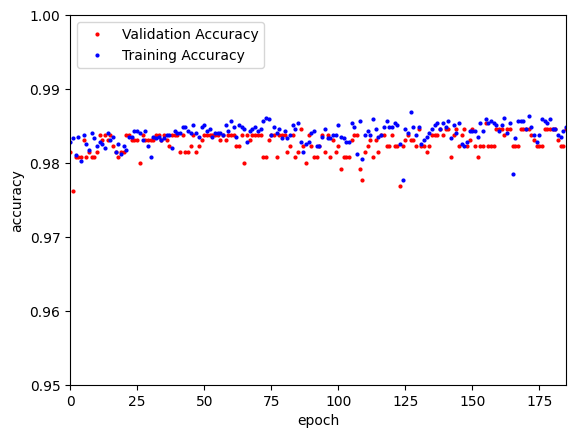

In [ ]:
# history 객체에서 학습셋과 검증셋의 정확도를 가져옵니다.
# 'acc' 대신 'accuracy' 를 사용해야 할 수도 있습니다. 이는 Keras 버전에 따라 다릅니다.
y_acc = history.history['accuracy'] # 'acc' 대신 'accuracy'를 사용하는 경우가 있습니다.
y_val_acc = history.history['val_accuracy'] # 마찬가지로 'val_accuracy'를 사용

# x 값을 지정합니다.
x_len = np.arange(len(y_acc))

# 검증셋의 정확도를 빨간색으로, 학습셋의 정확도를 파란색으로 표시합니다.
plt.plot(x_len, y_val_acc, "o", c="red", markersize=2, label='Validation Accuracy')
plt.plot(x_len, y_acc, "o", c="blue", markersize=2, label='Training Accuracy')

# 범례와 축 라벨을 추가합니다.
plt.legend(loc='upper left')
plt.xlim(0, len(y_acc)-1)
plt.ylim(0.95, 1.0)
plt.xlabel('epoch')
plt.ylabel('accuracy')

# 확인해보면.. 거의 횡렬을 이룰 정도로 있음

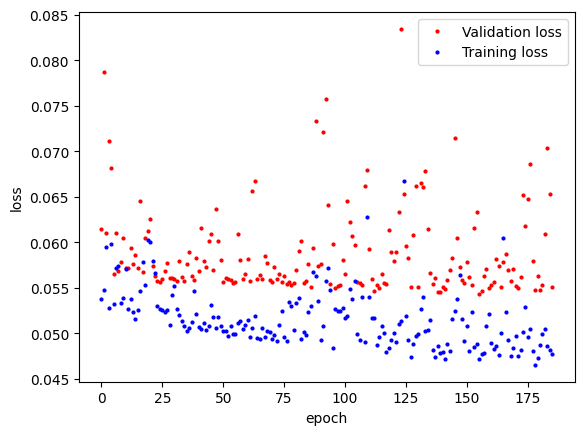

In [ ]:
import matplotlib.pyplot as plt

# y_vloss 에 테스트셋(여기서는 검증셋)의 오차를 저장합니다.
y_vloss=hist_df['val_loss']

# y_loss에 학습셋의 오차를 지정합니다.
y_loss = hist_df['loss']

# x 값을 지정하고 테스트셋(검증셋)의 오차를 빨간색으로, 학습셋의 오차를 파란색으로 표시합니다.
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, "o", c="red", markersize=2, label='Validation loss')
plt.plot(x_len, y_loss, "o", c="blue", markersize=2, label='Training loss')

plt.legend(loc='upper right')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

# Training loss 는 점점 내려가고
# Validation loss 는 내려가다가 어느 시점에서 더이상 개선이 안됨

In [ ]:
# 테스트 결과 출력
score= model.evaluate(X_test, y_test)
print('Test accuray:', score[1])

41/41 [==============================] - 0s 4ms/step - loss: 0.0375 - accuracy: 0.9869
Test accuray: 0.986923098564148


In [ ]:
# history에 저장된 학습 결과를 확인
hist_df = pd.DataFrame(history.history)
hist_df.head()

,loss,accuracy,val_loss,val_accuracy
0,0.053764,0.982807,0.061447,0.981538
1,0.054756,0.983320,0.078699,0.976154
2,0.059440,0.981011,0.060982,0.980769
3,0.052739,0.983577,0.071074,0.980769
4,0.059803,0.980241,0.068107,0.980769
